<a href="https://colab.research.google.com/github/Erick-Cavalcante/telegram_project/blob/main/telegram_project_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Contexto

*todas as fotos utilizadas podem ser encontradas no meu [Github](https://github.com/Erick-Cavalcante/telegram_project)

##1.1.Chatbot

Um **chatbot** é um tipo de software que interage com usuários através de conversas automatizadas em plataformas de mensagens. Uma aplicação comum de **chatbots** é o seu uso no atendimento ao cliente, onde, de maneira geral, ajudam clientes a resolver problemas ou esclarecer dúvidas recorrentes antes mesmo que um atendente humano seja acionado.

##1.2. Telegram

**Telegram** é uma plataforma de mensagens instantâneas freeware (distribuído gratuitamente) e, em sua maioria, open source. É muito popular entre desenvolvedores por ser pioneiro na implantação da funcionalidade de criação de **chatbots**, que, por sua vez, permitem a criação de diversas automações.

##1.3. Arquitetura

Uma atividade analítica de interesse é a de realizar a análise exploratória de dados enviadas a um **chatbot** para responder perguntas como:
* 1.Qual o horário que os usuários mais acionam o bot?
*  2.Qual o problema ou dúvida mais frequente?
* 3.O bot está conseguindo resolver os problemas ou esclarecer as dúvidas?
* 4.Etc.

Portanto, vamos construir um pipeline de dados que ingira, processe, armazene e exponha mensagens de um grupo do **Telegram** para que profissionais de dados possam realizar análises. A arquitetura proposta é dividida em duas: transacional, no **Telegram**, onde os dados são produzidos, e analítica, na Amazon Web Services (AWS), onde os dados são analisados

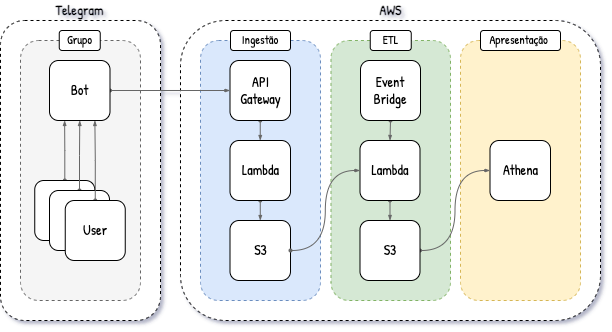

**.Telegram**

O Telegram representa a fonte de dados transacionais. Mensagens enviadas por usuários em um grupo são capturadas por um bot e redirecionadas via webhook do backend do aplicativo para um endpoint (endereço web que aceita requisições HTTP) exposto pelo AWS API Gateway. As mensagens trafegam no corpo ou payload da requisição.

**• AWS | Ingestão**

Uma requisição HTTP com o conteúdo da mensagem em seu payload é recebida pelo AWS API Gateway que, por sua vez, as redireciona para o AWS Lambda, servindo assim como seu gatilho. Já o AWS Lambda recebe o payload da requisição em seu parâmetro event, salva o conteúdo em um arquivo no formato JSON (original, mesmo que o payload) e o armazena no AWS S3 particionado por dia

**• AWS | ETL**

Uma vez ao dia, o AWS Event Bridge aciona o AWS Lambda que processa todas as mensagens do dia anterior (atraso de um dia ou D-1), denormaliza o dado semi-estruturado típico de arquivos no formato JSON, salva o conteúdo processado em um arquivo no formato Apache Parquet e o armazena no AWS S3 particionado por dia.

**• AWS | Apresentação**

Por fim, uma tabela do AWS Athena é apontada para o bucket do AWS S3 que armazena o dado processado: denormalizado, particionado e orientado a coluna. Profissionais de dados podem então executar consultas analíticas (agregações, ordenações, etc.) na tabela utilizando o SQL para a extração de insights.

#2.Telegram

O Telegram representa a fonte transacional de dados do nosso pipeline de dados. Nesta etapa, vamos criar um grupo, criar um bot e adicioná-lo ao grupo recém criado. O bot então captará todas as mensagens enviadas no grupo. As mensagens podem ser acessadas através da API (application programming interface) de bots dos Telegram (documentação no  [link](https://core.telegram.org/bots/api).)

##2.1 Conta

Para criar uma conta no Telegram, basta fazer o download do aplicativo na loja de aplicativos do seu smartphone. Uma vez criada, acesse sua conta através da versão web da plataforma de mensagens no link https://web.telegram.org/z/.

##2.2. Bot

Para criar um bot:

* Abra o chat com o BotFather;
* Digite /newbot;
* Digite o nome do bot;  
* Digite o nome de usuário do bot (precisa terminar com sufixo _bot);
* Salve o token de acesso a API HTTP em um local seguro.

Para conferir o token novamente:

* 1.  Abra o chat com o BotFather;
* 2. Digite /mybots;
* 3. Selecione o bot pelo seu nome de usuário;
* 4. Selecione API Token.

Por fim, precisamos ativar o bot.

* 1.  Abra o chat com o bot;
* 2. Selecione start .

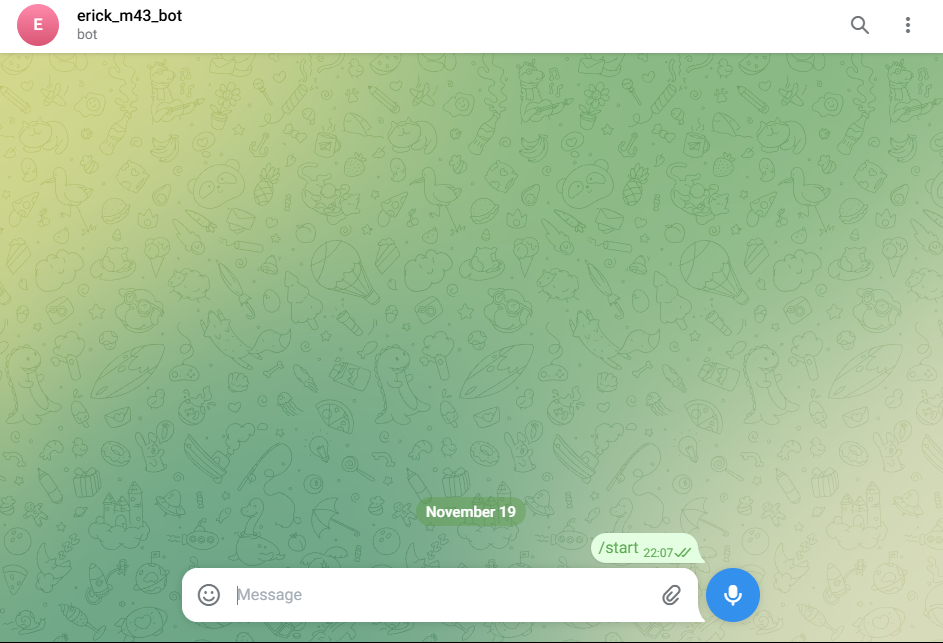


##2.3 Grupo

Grupo Para criar um novo grupo.
* 1.  Aperte o botão com o ícone de um lápis;
* 2. Selecione New Group;
* 3. Busque e selecione o bot recém criado pelo seu nome;
* 4. Aperte o botão com o ícone de uma seta;
* 5. Digite o nome do grupo.

Com o grupo criado, vamos adicionar o bot como administrador para que ele possa receber todas as mensagens do grupo. Uma outra opção seria desabilitar o seu modo de  privacidade.

1. Abra o chat do grupo recém criado;
2. Abra o perfil do grupo;
3. Aperte o botão com o ícone de um lápis;
4. No campo de descrição do grupo escreva: Atenção, todas as mensagens são armazenadas pelo bot do grupo;
5.  Selecione Administrators;
6.  Aperte o botão com o ícone de um usuário;
7.  Selecione o bot;
8. Aperte o botão com o ícone de um check.

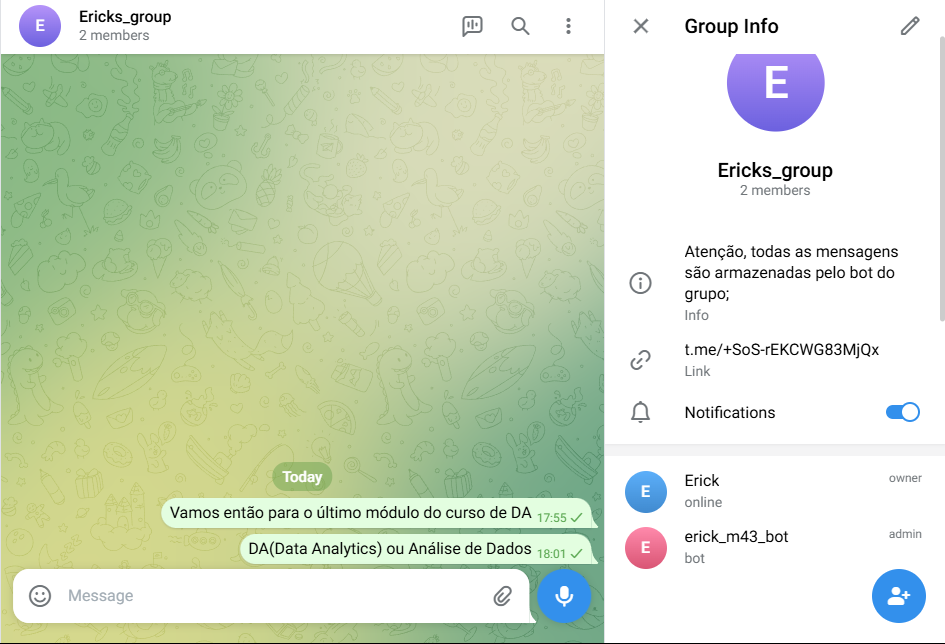

Por fim, vamos configurar o bot para que ele não possa ser adicionado a outros grupos.

1.  Abra o chat com o BotFather;
2. Digite /mybots;
3. Selecione o bot pelo seu nome de usuário;
4. Selecione Bot Settings;
5. Selecione Allow Groups?;
6. Selecione Turn groups off.

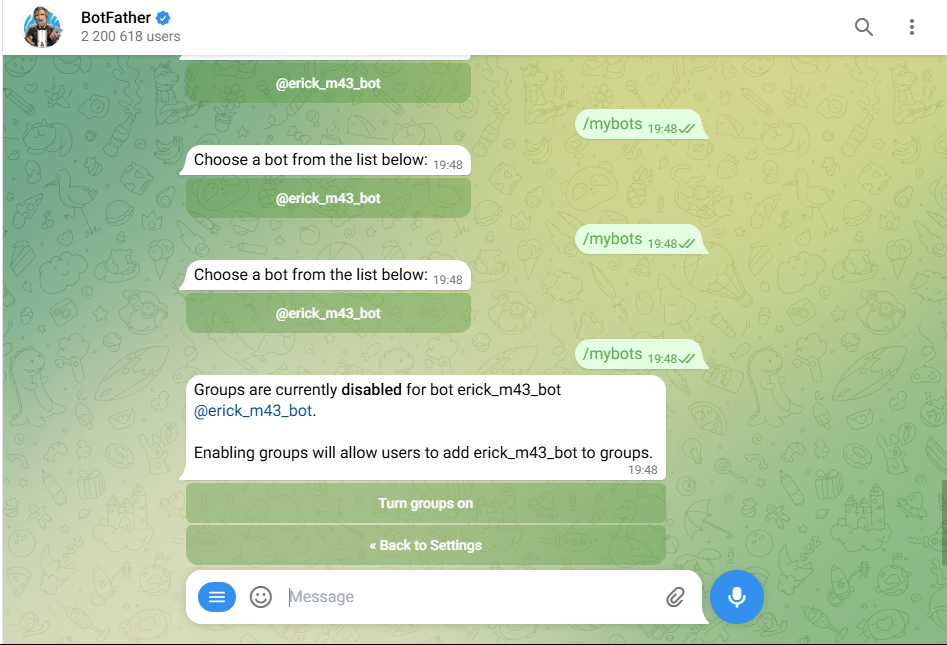


Com tudo pronto, envie algumas mensagens no grupo.

##2.4. Bot API

As mensagens captadas por um bot podem ser acessadas via API. A única informação necessária é o token de acesso fornecido pelo BotFather na criação do bot.

**Nota**: A documentação completa da API pode ser encontrada no [link](https://core.telegram.org/bots/api.)

In [ ]:
from getpass import getpass
token = getpass()

··········


A url base é comum a todos os métodos da API.

In [ ]:
import json
import requests

base_url = f'https://api.telegram.org/bot{token}'

• **getMe**

O método getMe retorna informações sobre o bot.

In [ ]:
response = requests.get(url=f'{base_url}/getMe')
print(f'{base_url}/getMe')
print(json.dumps(json.loads(response.text), indent=2))

https://api.telegram.org/bot7722758476:AAFHRqvygAx1TrzbeHUc4afDyz5QHqSRubQ/getMe
{
  "ok": true,
  "result": {
    "id": 7722758476,
    "is_bot": true,
    "first_name": "erick_m43_bot",
    "username": "erick_m43_bot",
    "can_join_groups": false,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false,
    "can_connect_to_business": false,
    "has_main_web_app": false
  }
}


• **getUpdates**

O método getUpdates retorna as mensagens captadas pelo bot.

In [ ]:
response = requests.get(url=f'{base_url}/getUpdates')
print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 110871527,
      "message": {
        "message_id": 28,
        "from": {
          "id": 6421189136,
          "is_bot": false,
          "first_name": "Erick",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002352244323,
          "title": "Ericks_group",
          "type": "supergroup"
        },
        "date": 1733259315,
        "text": "Vamos ent\u00e3o para o \u00faltimo m\u00f3dulo do curso de DA"
      }
    },
    {
      "update_id": 110871528,
      "message": {
        "message_id": 29,
        "from": {
          "id": 6421189136,
          "is_bot": false,
          "first_name": "Erick",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002352244323,
          "title": "Ericks_group",
          "type": "supergroup"
        },
        "date": 1733259702,
        "text": "DA(Data Analytics) ou An\u00e1lise de Dados"
      }
    }
  ]
}


#3.Dados

##3.1Mensagem

Uma mensagem recuperada via API é um dado semiestruturado no formato JSON com algumas chaves mandatórias e diversas chaves opcionais, estas últimas presentes (ou não) dependendo do tipo da mensagem. Por exemplo, mensagens de texto apresentam a chave text enquanto mensagens de áudio apresentam a chave audio. Neste projeto vamos focar em mensagens do tipo texto, ou seja, vamos ingerir as chaves mandatórias e a chave text.

Nota: A lista completa das chaves disponíveis pode ser encontrada no [link](https://core.telegram.org/bots/api#message.)

Exemplo:

In [ ]:
%%writefile telegram.json
 {
  "ok": true,
  "result": [
    {
      "update_id": 110871527,
      "message": {
        "message_id": 28,
        "from": {
          "id": 6421189136,
          "is_bot": false,
          "first_name": "Erick",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002352244323,
          "title": "Ericks_group",
          "type": "supergroup"
        },
        "date": 1733259315,
        "text": "Vamos então para o último módulo do curso de DA"
      }
    },
    {
      "update_id": 110871528,
      "message": {
        "message_id": 29,
        "from": {
          "id": 6421189136,
          "is_bot": false,
          "first_name": "Erick",
          "language_code": "pt-br"
        },
        "chat": {
          "id": -1002352244323,
          "title": "Ericks_group",
          "type": "supergroup"
        },
        "date": 1733259702,
        "text": "DA(Data Analytics) ou Análise de Dados"
      }
    }
  ]
}


Overwriting telegram.json


##3.1.Wrangling

Vamos denormalizaro conteúdo da mensagem semiestruturado no formato JSON utilizando apenas Python nativo, ou seja, sem o auxílio de pacotes, como Pandas.

Para começar, vamos carregar o arquivo telegram.json utilizando o pacote nativo json

In [ ]:
import json

# Carregar o arquivo JSON
with open('telegram.json', mode='r', encoding='utf8') as fp:
    data = json.load(fp)

In [ ]:
# Preparar o dicionário para armazenar os dados processados
parsed_data = dict()

Vamos, então, utilizar um laço de repetição para varrer todas as chaves do arquivo e selecionar apenas as de interesse. Caso a mensagem não possua a chave text , ela será criada com o valor igual a None . Além disso, vamos adicionar duas chaves de tempo para indicar o momento em que o dado foi processado: context_date e context_timestamp.

In [ ]:
from datetime import datetime
import json

# Carregar o arquivo JSON
with open('telegram.json', mode='r', encoding='utf8') as fp:
    data = json.load(fp)

# Definindo data e timestamp para o contexto
date = datetime.now().strftime('%Y-%m-%d')
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Preparando o dicionário para armazenar os dados processados
parsed_data = dict()

# Garantir que o campo 'text' seja extraído corretamente
for entry in data["result"]:
    message = entry["message"]

    # Processar os dados de 'from'
    user_data = message.get('from', {})
    for k, v in user_data.items():
        if k in ['id', 'is_bot', 'first_name']:
            parsed_data[f"user_{k}"] = [v]

    # Processar os dados de 'chat'
    chat_data = message.get('chat', {})
    for k, v in chat_data.items():
        if k in ['id', 'type']:
            parsed_data[f"chat_{k}"] = [v]

    # Processar 'message_id' e 'date'
    parsed_data['message_id'] = [message.get('message_id')]
    parsed_data['date'] = [datetime.utcfromtimestamp(message.get('date')).strftime('%Y-%m-%d %H:%M:%S')]

    # Processar 'text', se existir
    parsed_data['text'] = [message.get('text', None)]  # Adiciona o texto ou None caso não exista

# Se a chave 'text' não foi encontrada em 'data', garanta que seja None
if 'text' not in parsed_data:
    parsed_data['text'] = [None]

# Adicionar a data e o timestamp do contexto
parsed_data['context_date'] = [date]
parsed_data['context_timestamp'] = [timestamp]


In [ ]:
#imprimir os resultados
for k, v in parsed_data.items():
    print(f"{k}: {v}")

user_id: [6421189136]
user_is_bot: [False]
user_first_name: ['Erick']
chat_id: [-1002352244323]
chat_type: ['supergroup']
message_id: [29]
date: ['2024-12-03 21:01:42']
text: ['DA(Data Analytics) ou Análise de Dados']
context_date: ['2024-12-04']
context_timestamp: ['2024-12-04 00:26:51']


Por fim, vamos utilizar o pacote Python PyArrow para criar uma tabela com os dados processado que, posteriormente, pode ser facilmente persistida em um arquivo no formato Apache Parquet.

In [ ]:
import pyarrow as pa
table = pa.Table.from_pydict(mapping=parsed_data)

In [ ]:
table

pyarrow.Table
user_id: int64
user_is_bot: bool
user_first_name: string
chat_id: int64
chat_type: string
message_id: int64
date: string
text: string
context_date: string
context_timestamp: string
----
user_id: [[6421189136]]
user_is_bot: [[false]]
user_first_name: [["Erick"]]
chat_id: [[-1002352244323]]
chat_type: [["supergroup"]]
message_id: [[29]]
date: [["2024-12-03 21:01:42"]]
text: [["DA(Data Analytics) ou Análise de Dados"]]
context_date: [["2024-12-04"]]
context_timestamp: [["2024-12-04 00:26:51"]]